In [1]:
# Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib
import scipy.stats as st
import seaborn as sns; sns.set();
from sklearn import datasets

In [2]:
# Name of the CSV file
csv_path1 = 'googleplaystore.csv'
csv_path2 = 'AppleStore.csv'

In [3]:
# The read the CSV file in pandas
googlestore = pd.read_csv(csv_path1)
googlestore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
applestore = pd.read_csv(csv_path2)

applestore.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
applestore.rename(columns={'track_name':'App',
                          'size_bytes':'Size',
                          'price':'Price',
                          'rating_count_tot':'Reviews',
                          'user_rating':'Rating',
                          'cont_rating':'Content Rating',
                          'prime_genre':'Category'}, 
                 inplace=True)
 
applestore.head()

,Unnamed: 0,id,App,Size,currency,Price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,Content Rating,Category,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [6]:
# Delete column "Current Ver" , "Android Ver" and "Genres"
del googlestore["Current Ver"]
del googlestore["Android Ver"] 
del googlestore["Genres"] 
del applestore["rating_count_ver"] 
del applestore["user_rating_ver"]
del applestore["ver"]
del applestore["sup_devices.num"]
del applestore["ipadSc_urls.num"]
del applestore["lang.num"]
del applestore["vpp_lic"]
del applestore["Unnamed: 0"]
del applestore["id"]   


In [7]:
applestore.head()

,App,Size,currency,Price,Reviews,Rating,Content Rating,Category
0,PAC-MAN Premium,100788224,USD,3.99,21292,4.0,4+,Games
1,Evernote - stay organized,158578688,USD,0.00,161065,4.0,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,3.5,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,4.0,12+,Shopping
4,Bible,92774400,USD,0.00,985920,4.5,4+,Reference


In [8]:
# Identify incomplete rows
googlestore.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Last Updated      10841
dtype: int64

In [9]:
# Drop all rows with missing information
googlestore = googlestore.dropna(how='any')

In [10]:
# Verify dropped rows
googlestore.count()

App               9366
Category          9366
Rating            9366
Reviews           9366
Size              9366
Installs          9366
Type              9366
Price             9366
Content Rating    9366
Last Updated      9366
dtype: int64

In [11]:
applestore.count()

App               7197
Size              7197
currency          7197
Price             7197
Reviews           7197
Rating            7197
Content Rating    7197
Category          7197
dtype: int64

In [12]:
# The "Reviews" and "Price" column are the wrong data types. They should be numeric.
googlestore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Last Updated       object
dtype: object

In [13]:
# Convert the datatype of 'Reviews' column
googlestore['Reviews'] = pd.to_numeric(googlestore['Reviews'])

# Remove dollar sign and convert the datatype of 'Price' column
googlestore['Price'] = googlestore['Price'].str.replace('$', '')
googlestore['Price'] = pd.to_numeric(googlestore['Price'])

In [14]:
# Remove + sign and convert the datatype of 'Installs' column
googlestore['Installs'] = googlestore['Installs'].str.replace(",","")
googlestore['Installs'] = googlestore['Installs'].apply(lambda x: x.strip("+"))
googlestore['Installs']=googlestore['Installs'].astype(float)

In [15]:
# Make size into numeric
googlestore['Size'].replace('Varies with device', np.nan, inplace = True)
googlestore['Size']=googlestore['Size'].str.extract(r'([\d\.]+)', expand=False).astype(float) * \
googlestore['Size'].str.extract(r'([kM]+)', expand=False).fillna(1).replace(['k','M'],[1,1000]).astype(int)


In [16]:
# Replace _ sign to space in 'Category' column
googlestore['Category'] = googlestore['Category'].str.replace('_', ' ')

In [17]:
# Verify datatypes have been changed
googlestore.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Last Updated       object
dtype: object

In [18]:
applestore.dtypes

App                object
Size                int64
currency           object
Price             float64
Reviews             int64
Rating            float64
Content Rating     object
Category           object
dtype: object

In [19]:
# Push the cleaned dataset to a new CSV file
# googlestore.to_csv("googlestore_clean.csv",
#                   encoding="utf-8", index=False, header=True)

In [20]:
# Display a statistical overview
googlestore.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,7729.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22957.606870,1.789744e+07,0.960928
std,0.515219,3.144042e+06,23445.491095,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,5300.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,14000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,33000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


# Which categories have the highest number of available apps?

In [21]:
# Display an overview of the Category column
googlestore['Category'].value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
PERSONALIZATION         314
LIFESTYLE               314
BUSINESS                303
HEALTH AND FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS AND MAGAZINES      233
TRAVEL AND LOCAL        226
DATING                  195
BOOKS AND REFERENCE     178
VIDEO PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS AND NAVIGATION     124
FOOD AND DRINK          109
HOUSE AND HOME           76
WEATHER                  75
AUTO AND VEHICLES        73
LIBRARIES AND DEMO       65
ART AND DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [22]:
print(f"The Google Play Store have {googlestore['Category'].nunique()} categories")

print("The Google Play Store categories are:", googlestore['Category'].unique())

The Google Play Store have 33 categories
The Google Play Store categories are: ['ART AND DESIGN' 'AUTO AND VEHICLES' 'BEAUTY' 'BOOKS AND REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD AND DRINK' 'HEALTH AND FITNESS' 'HOUSE AND HOME'
 'LIBRARIES AND DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL AND LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO PLAYERS'
 'NEWS AND MAGAZINES' 'MAPS AND NAVIGATION']


In [23]:
print(f" In Google Play Store,  the Top three categories have most numbers of apps are {googlestore['Category'].value_counts().index[0]}, {googlestore['Category'].value_counts().index[1]} and {googlestore['Category'].value_counts().index[2]}.")

 In Google Play Store,  the Top three categories have most numbers of apps are FAMILY, GAME and TOOLS.


In [24]:
applestore['Category'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: Category, dtype: int64

In [25]:
print(f"The Apple Store have {applestore['Category'].nunique()} categories")
print("The Apple Store categories are:", applestore['Category'].unique())

The Apple Store have 23 categories
The Apple Store categories are: ['Games' 'Productivity' 'Weather' 'Shopping' 'Reference' 'Finance' 'Music'
 'Utilities' 'Travel' 'Social Networking' 'Sports' 'Business'
 'Health & Fitness' 'Entertainment' 'Photo & Video' 'Navigation'
 'Education' 'Lifestyle' 'Food & Drink' 'News' 'Book' 'Medical' 'Catalogs']


In [26]:
print(f" In Apple Store,  the Top three categories have most numbers of apps are {applestore['Category'].value_counts().index[0]}, {applestore['Category'].value_counts().index[1]} and {applestore['Category'].value_counts().index[2]}.")

 In Apple Store,  the Top three categories have most numbers of apps are Games, Entertainment and Education.


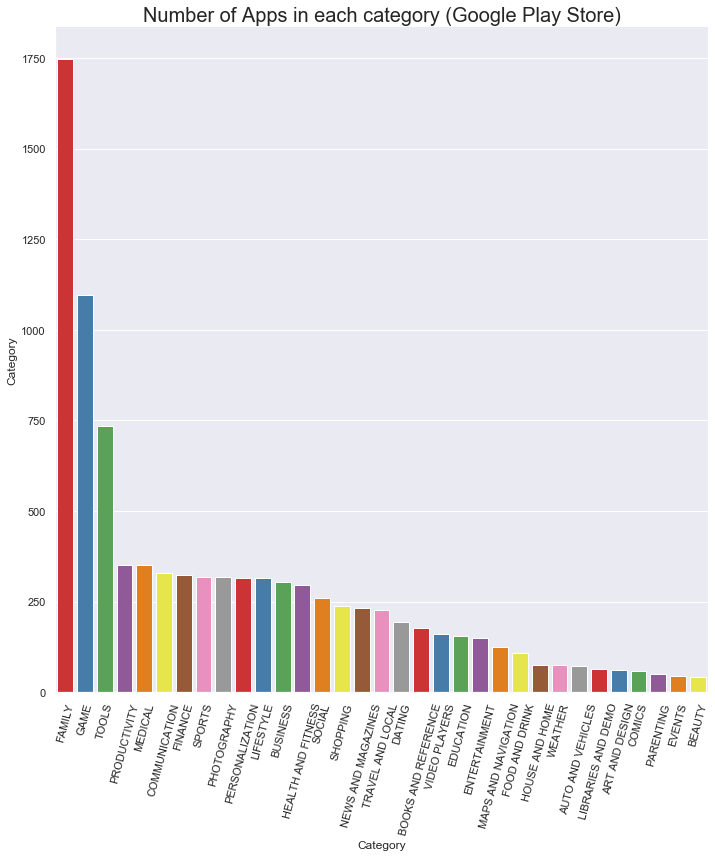

In [27]:
def plotchart(tab): 
    plot = sns.catplot(x=tab,y=compare, data=dataset, kind=formats, height = 10,
    palette = "Set1", order= orders)
    plot.set_xticklabels(rotation=75, ha="center")
    plot = plot.set_ylabels(tab)
    plt.title(title,size = 20)
    plt.savefig(f"{title}.jpg")

tab = "Category"
compare = None
dataset = googlestore
title = 'Number of Apps in each category (Google Play Store)'
orders= googlestore["Category"].value_counts().index
formats = "count"

plotchart(tab)

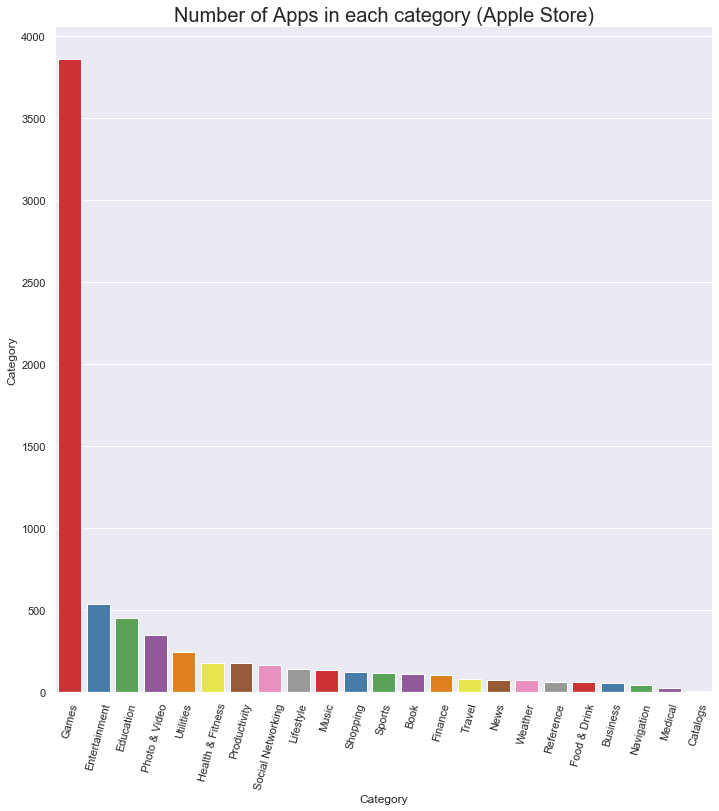

In [28]:
tab = "Category"
compare = None
dataset = applestore
title = 'Number of Apps in each category (Apple Store)'
orders= applestore["Category"].value_counts().index
formats = "count"

plotchart(tab)

### Which categories have the highest number of available apps?
Conclusion:  Game category has the most number of apps on the market

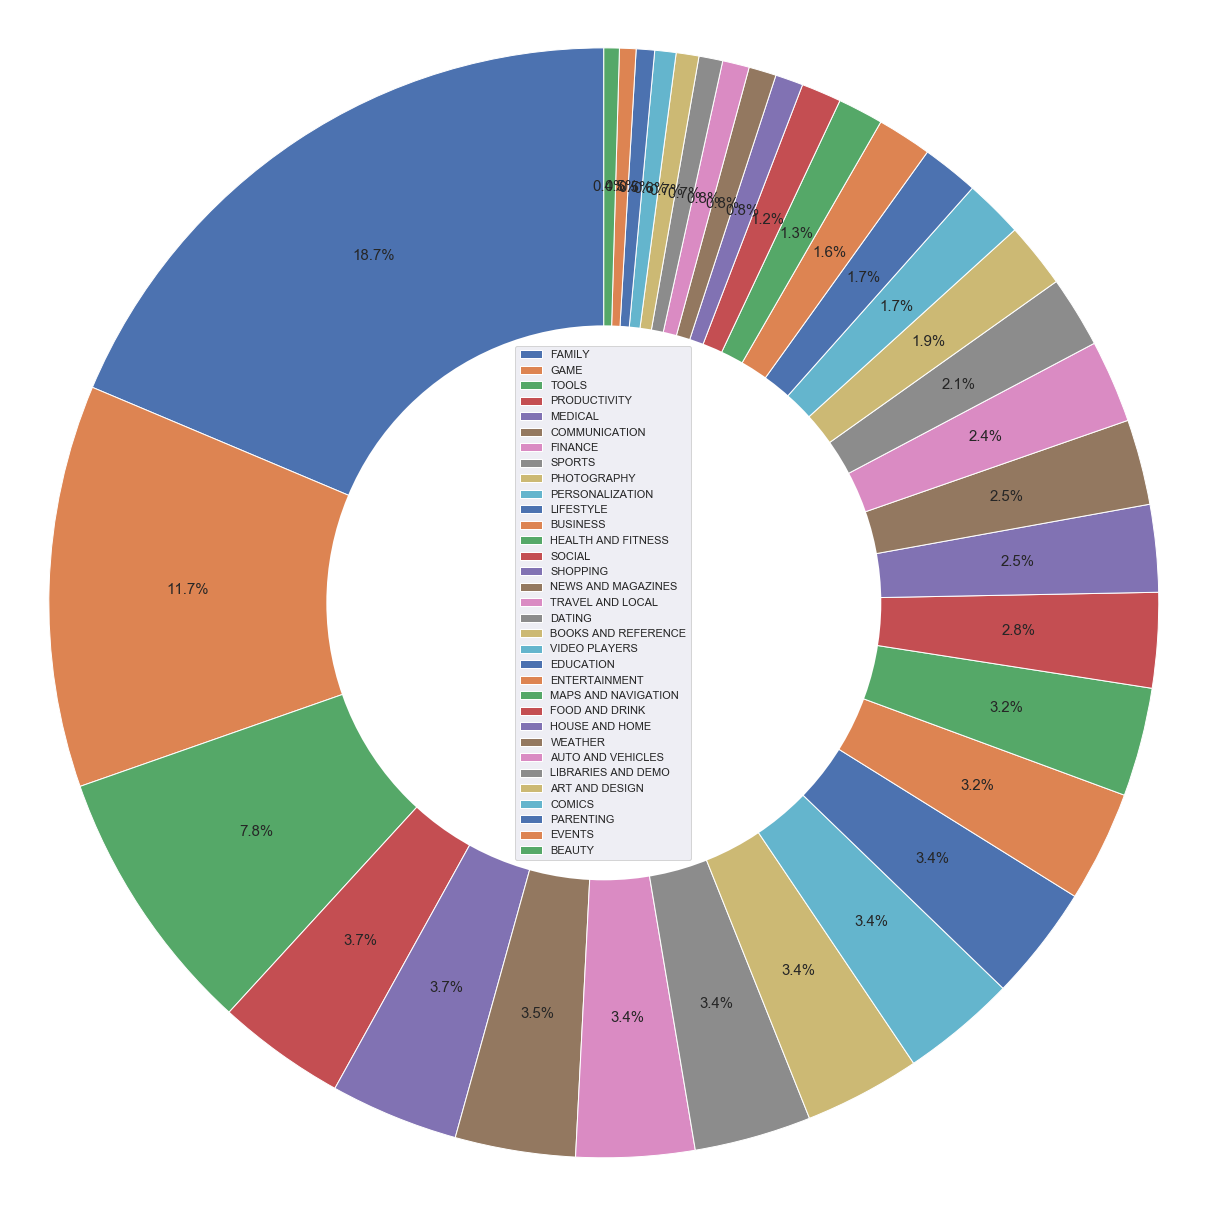

In [131]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = googlestore['Category'].value_counts().index
data = googlestore['Category'].value_counts()
# types = googlestore['Type'].value_counts()
# type_labels= googlestore['Type'].value_counts().index

matplotlib.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(17, 17))

ax.pie(data,  autopct='%1.1f%%', startangle=90, pctdistance=0.75)

plt.legend(labels, loc="center")

# ax.pie(types,labels=type_labels, radius=0.75,startangle=90, autopct='%1.1f%%')

#draw circle
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

plt.savefig(f"Catagory Pie Chart.jpg")

plt.show()


# Which categories have the highest number of installs?

In [29]:
# Which categories have the highest number of installs?
group= googlestore.groupby(googlestore['Category'])
sum_installs = group["Installs"].sum()
sort_installs = sum_installs.sort_values(ascending=False)
print(sum_installs.sum())
print(sort_installs)

167627457938.0
Category
GAME                   3.508586e+10
COMMUNICATION          3.264724e+10
PRODUCTIVITY           1.417607e+10
SOCIAL                 1.406984e+10
TOOLS                  1.145072e+10
FAMILY                 1.025770e+10
PHOTOGRAPHY            1.008824e+10
NEWS AND MAGAZINES     7.496211e+09
TRAVEL AND LOCAL       6.868859e+09
VIDEO PLAYERS          6.221897e+09
SHOPPING               3.247832e+09
ENTERTAINMENT          2.869160e+09
PERSONALIZATION        2.325353e+09
BOOKS AND REFERENCE    1.921292e+09
SPORTS                 1.751131e+09
HEALTH AND FITNESS     1.583056e+09
BUSINESS               1.001768e+09
FINANCE                8.766124e+08
EDUCATION              8.713520e+08
MAPS AND NAVIGATION    7.242676e+08
LIFESTYLE              5.375611e+08
WEATHER                4.260965e+08
FOOD AND DRINK         2.737778e+08
DATING                 2.642951e+08
HOUSE AND HOME         1.685820e+08
ART AND DESIGN         1.242331e+08
LIBRARIES AND DEMO     6.208300e+07
COMI

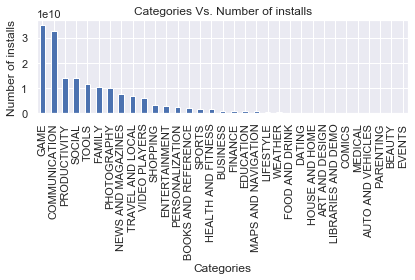

In [30]:
installs_plot = sort_installs.plot(kind="bar")

installs_plot.set_xticklabels(sort_installs.index, rotation = 90,ha="center")
# Configure plot and ticks

plt.title("Categories Vs. Number of installs")
plt.xlabel("Categories")
plt.ylabel("Number of installs")
# Set textual properties

plt.tight_layout()# Show plot
plt.savefig("Categories Vs. Number of installs.jpg")


In [31]:
print(f" In Google Play Store,  the category has the highest number of installs is {sort_installs.index[0]}.")

 In Google Play Store,  the category has the highest number of installs is GAME.


# The market shows the Game Category has most installs and most apps. It indicates the market demands.

# What is the average price per category? (discounting free apps)


In [32]:
# find paid apps for Price is not equal to 0 
googlestore_df= googlestore[googlestore.Price != 0]
googlestore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000.0,Paid,4.99,Everyone,25-Mar-18
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000.0,Paid,4.99,Everyone,11-Apr-17
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000.0,Paid,4.99,Everyone,25-Mar-18
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000.0,Paid,4.99,Everyone,11-Apr-17
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000.0,Paid,3.99,Everyone,5-Jul-18


In [71]:
average_price = googlestore_df.groupby(["Category"])['Price'].mean()
sort_price = average_price.sort_values(ascending=False)
# sort_price.style.format({'Average Price': '${:.2f}'})
sort_price

Category
FINANCE                187.682308
LIFESTYLE              108.937778
FAMILY                  14.177407
MEDICAL                 11.853864
BUSINESS                 6.762727
DATING                   5.740000
MAPS AND NAVIGATION      5.390000
PHOTOGRAPHY              4.902222
PARENTING                4.790000
TRAVEL AND LOCAL         4.686250
EDUCATION                4.490000
FOOD AND DRINK           4.240000
SPORTS                   4.236818
WEATHER                  4.204286
ENTERTAINMENT            3.990000
PRODUCTIVITY             3.940000
HEALTH AND FITNESS       3.781667
GAME                     3.641039
TOOLS                    3.300000
BOOKS AND REFERENCE      2.985000
SHOPPING                 2.740000
VIDEO PLAYERS            2.615000
COMMUNICATION            2.576818
NEWS AND MAGAZINES       1.990000
AUTO AND VEHICLES        1.990000
ART AND DESIGN           1.990000
PERSONALIZATION          1.906866
SOCIAL                   0.990000
Name: Price, dtype: float64

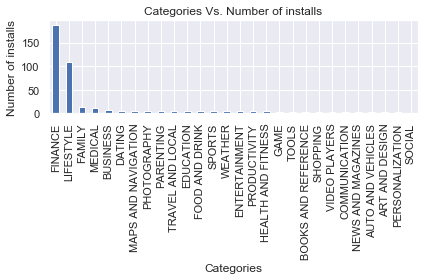

In [68]:
price_plot = sort_price.plot(kind="bar")

price_plot.set_xticklabels(sort_price.index, rotation = 90,ha="center")
# Configure plot and ticks

plt.title("Categories Vs. Number of installs")
plt.xlabel("Categories")
plt.ylabel("Number of installs")
# Set textual properties

plt.tight_layout()# Show plot
plt.savefig("Categories Vs. Number of installs.jpg")


In [ ]:
average_price = googlestore_df.groupby(["Category"])['Price'].mean() 
sort_price = average_price.sort_values(ascending = False)
average_price_df = pd.DataFrame({'Average Price': average_price})
average_price_df.style.format({'Average Price': '${:.2f}'})
average_price_df = average_price.reset_index()
#average_price_df.style.format({'Price': '${:.2f}'})
average_price_df

# What distribution of free v. paid apps across categories

In [78]:
count_free = googlestore_df.groupby(["Category"])['Type'].sum()
count_free

Category
ART AND DESIGN                                              PaidPaidPaid
AUTO AND VEHICLES                                                   Paid
BOOKS AND REFERENCE                     PaidPaidPaidPaidPaidPaidPaidPaid
BUSINESS                    PaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPaid
COMMUNICATION          PaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPa...
DATING                                                  PaidPaidPaidPaid
EDUCATION                                               PaidPaidPaidPaid
ENTERTAINMENT                                                   PaidPaid
FAMILY                 PaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPa...
FINANCE                PaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPa...
FOOD AND DRINK                                                  PaidPaid
GAME                   PaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPa...
HEALTH AND FITNESS      PaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPaid
LIFESTYLE              PaidPaidPaidPaidPai

# What is the correlation between Installs and Reviews?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


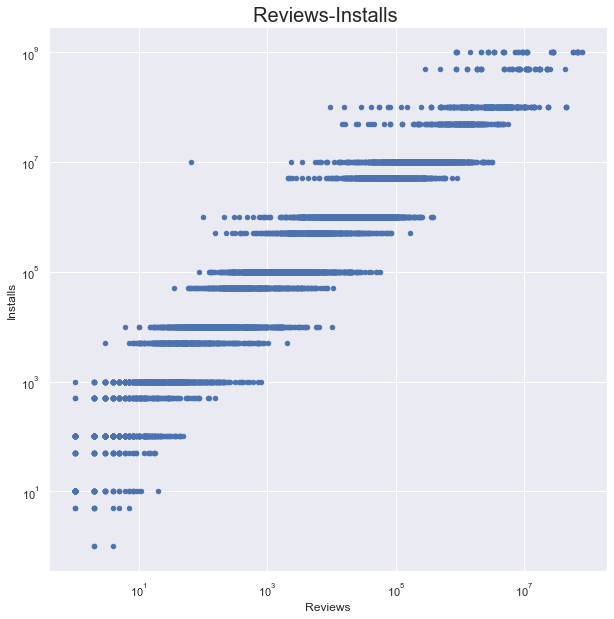

In [88]:
googlestore.plot(kind="scatter", y="Installs", x="Reviews", grid=True, figsize=(10,10), title="Installs VS Reviews")
plt.xscale('log')
plt.yscale('log')
plt.title('Reviews-Installs ', size = 20)
plt.savefig(f"installs_reviews.jpg")

In [75]:
installs = googlestore.iloc[:,5]
reviews = googlestore.iloc[:,3]
correlation = st.pearsonr(installs,reviews)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.64


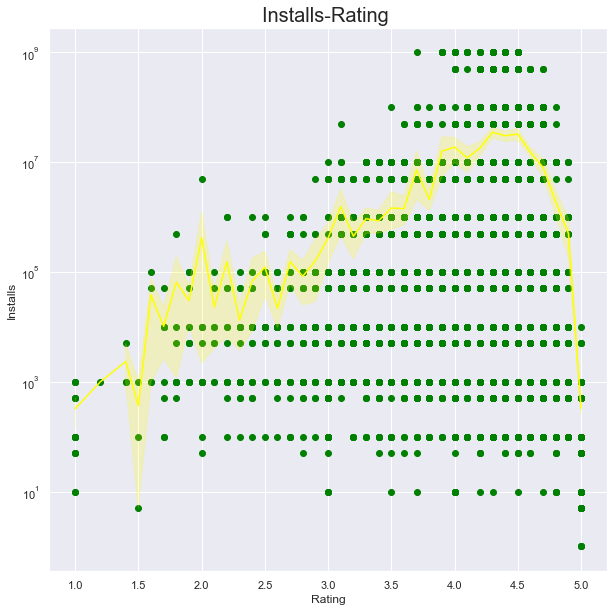

In [89]:
# What is the correlation between the rating and installs?
plt.figure(figsize=(10,10))
plt.scatter(x=googlestore['Rating'], y=googlestore['Installs'], color = 'green')
g = sns.lineplot(x="Rating", y="Installs",color="yellow",data=googlestore)
plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.title('Installs-Rating ', size = 20)
plt.savefig(f"installs_rating.jpg")
plt.show()

In [77]:
rating = googlestore.iloc[:,2]
correlation = st.pearsonr(installs,rating)
print(f"The correlation between an app's rating and the times it has been installed is {round(correlation[0],2)}")

The correlation between an app's rating and the times it has been installed is 0.05


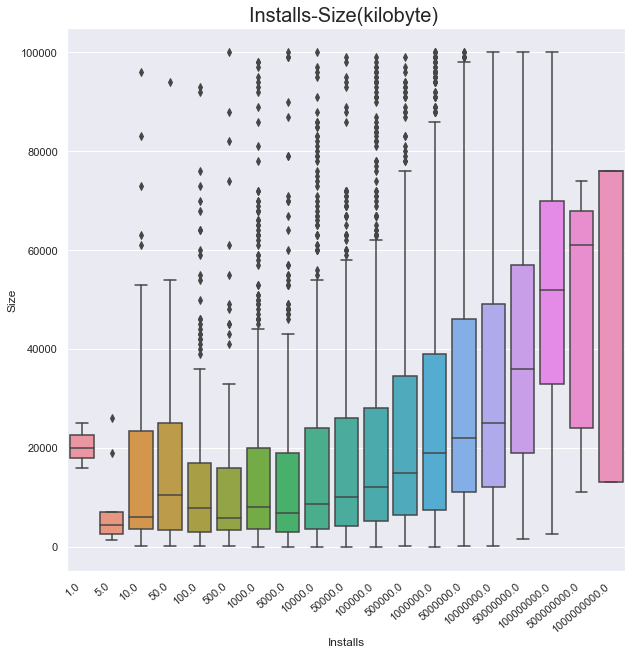

In [90]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x="Installs", y="Size", data=googlestore)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.title('Installs-Size(kilobyte) ', size = 20)
plt.savefig(f"installs_size.jpg")

In [ ]:
# def plotchart(tab): 
#     plot = sns.catplot(x=tab,y=compare, data=dataset, kind=formats, height = 10,
#     palette = "Set1", order= orders)
#     plot.set_xticklabels(rotation=75, ha="center")
#     plot = plot.set_ylabels(tab)
#     plt.title(title,size = 20)
#     plt.savefig(f"{title}.jpg")

tab = "Reviews"
compare = "Rating"
dataset = googlestore
title = 'Number of Apps in each category (Google Play Store)'
orders= None
formats = "strip"

plotchart(tab)